# DA5401 A5: Visualizing Data Veracity Challenges in Multi-Label Classification

In [1]:
!pip install liac-arff



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Load ARFF
import arff
import pandas as pd
data = arff.load(open(r"C:\Users\HP\Downloads\yeast\yeast.arff"))

# Convert to DataFrame
df = pd.DataFrame(data['data'], columns=[a[0] for a in data['attributes']])

# Separate features and labels
X = df.iloc[:, :-14]   # first 103 columns
Y = df.iloc[:, -14:]   # last 14 columns


In [4]:
print(X.head())
print(Y.head())
print("Feature matrix shape (X):", X.shape)
print("Label matrix shape (y):", Y.shape)

       Att1      Att2      Att3      Att4      Att5      Att6      Att7  \
0  0.004168 -0.170975 -0.156748 -0.142151  0.058781  0.026851  0.197719   
1 -0.103956  0.011879 -0.098986 -0.054501 -0.007970  0.049113 -0.030580   
2  0.509949  0.401709  0.293799  0.087714  0.011686 -0.006411 -0.006255   
3  0.119092  0.004412 -0.002262  0.072254  0.044512 -0.051467  0.074686   
4  0.042037  0.007054 -0.069483  0.081015 -0.048207  0.089446 -0.004947   

       Att8      Att9     Att10  ...     Att94     Att95     Att96     Att97  \
0  0.041850  0.066938 -0.056617  ...  0.006166 -0.012976 -0.014259 -0.015024   
1 -0.077933 -0.080529 -0.016267  ...  0.007680  0.027719 -0.085811  0.111123   
2  0.013646 -0.040666 -0.024447  ...  0.096277 -0.044932 -0.089470 -0.009162   
3 -0.007670  0.079438  0.062184  ... -0.083809  0.200354 -0.075716  0.196605   
4  0.064456 -0.133387  0.068878  ... -0.060467  0.044351 -0.057209  0.028047   

      Att98     Att99    Att100    Att101    Att102    Att103  
0 -0

In [5]:
n_samples, n_features = X.shape
n_labels = Y.shape[1]

print(f"Number of samples: {n_samples}")
print(f"Number of features: {n_features}")
print(f"Number of labels: {n_labels}")

Number of samples: 2417
Number of features: 103
Number of labels: 14


In [8]:
import numpy as np
import pandas as pd
from collections import Counter

# Assume Y is your (n_samples × 14) binary label matrix (numpy array or DataFrame)
# Convert to numpy array if needed
if isinstance(Y, pd.DataFrame):
    Y = Y.astype(int).values
else:
    Y = Y.astype(int)

label_names = [f"Class {i+1}" for i in range(Y.shape[1])]

# --- Step 1: Convert each row into a tuple of active label names ---
label_combinations = [tuple(np.array(label_names)[np.where(row == 1)[0]]) for row in Y]

# --- Step 2: Count frequency of each unique combination ---
combo_counts = Counter(label_combinations)

# --- Step 3: Separate single-label and multi-label combinations ---
single_label_counts = {k: v for k, v in combo_counts.items() if len(k) == 1}
multi_label_counts = {k: v for k, v in combo_counts.items() if len(k) > 1}

# --- Step 4: Identify top 2 single-labels and top 1 multi-label combination ---
top2_single = Counter(single_label_counts).most_common(2)
top1_multi = Counter(multi_label_counts).most_common(1)

# --- Step 5: Print summary ---
print("3. Label Selection for Visualization")
print(f"\nFound {len(single_label_counts)} unique single-label combinations.")
print(f"\nTop 2 most frequent single-label combinations: {top2_single if top2_single else 'None'}")
print(f"\nFound {len(multi_label_counts)} unique multi-label combinations.")
print(f"\nTop 1 most frequent multi-label combination: {top1_multi if top1_multi else 'None'}")

# --- Step 6: Assign categories for visualization ---
# Handle edge cases gracefully
cat1 = f"Only {', '.join(top2_single[0][0])}" if len(top2_single) > 0 else None
cat2 = f"Only {', '.join(top2_single[1][0])}" if len(top2_single) > 1 else None
cat3 = f"Multi: {', '.join(top1_multi[0][0])}" if len(top1_multi) > 0 else None

# Map each data point
def map_to_category(lbl_tuple):
    if lbl_tuple == top2_single[0][0]:
        return cat1
    elif len(top2_single) > 1 and lbl_tuple == top2_single[1][0]:
        return cat2
    elif len(top1_multi) > 0 and lbl_tuple == top1_multi[0][0]:
        return cat3
    else:
        return "Other"

y_viz = np.array([map_to_category(l) for l in label_combinations])

# --- Step 7: Print final summary ---
print("\nVisualization Category Summary")
if cat1:
    print(f"Category 1: '{cat1}' (Count: {np.sum(y_viz == cat1)})")
if cat2:
    print(f"Category 2: '{cat2}' (Count: {np.sum(y_viz == cat2)})")
if cat3:
    print(f"Category 3: '{cat3}' (Count: {np.sum(y_viz == cat3)})")
print(f"Other: {np.sum(y_viz == 'Other')} samples")

# --- Step 8: Display label distribution ---
print("\nDistribution of the new visualization target variable (y_viz)")
print(pd.Series(y_viz).value_counts())


3. Label Selection for Visualization

Found 1 unique single-label combinations.

Top 2 most frequent single-label combinations: [((np.str_('Class 1'),), 32)]

Found 197 unique multi-label combinations.

Top 1 most frequent multi-label combination: [((np.str_('Class 3'), np.str_('Class 4'), np.str_('Class 12'), np.str_('Class 13')), 237)]

Visualization Category Summary
Category 1: 'Only Class 1' (Count: 32)
Category 3: 'Multi: Class 3, Class 4, Class 12, Class 13' (Count: 237)
Other: 2148 samples

Distribution of the new visualization target variable (y_viz)
Other                                          2148
Multi: Class 3, Class 4, Class 12, Class 13     237
Only Class 1                                     32
Name: count, dtype: int64


# 4. Scaling 

# Why Scaling Is Crucial Before Distance-Based Dimensionality Reduction

Standardization (Z-score normalization) is a common technique that transforms the data to have a mean of 0 and a standard deviation of 1. This ensures that each feature has the same scale, making them comparable.

Both **t-SNE** and **Isomap** rely on pairwise distance calculations in high-dimensional space. Scaling ensures that all features contribute equally to these distances.


## 1. Distance Sensitivity
- Distance-based algorithms (e.g., Euclidean) are affected by feature ranges.  
If one feature spans 0–1000 while another spans 0–1, the larger-scale feature dominates, distorting relationships between points.


- Example:
Suppose Att1 ranges from 0–1000 and Att2 from 0–1.
The model will treat variation in Att1 as much more important, distorting the geometry of the data in the low-dimensional embedding.

## 2. Preserving Manifold Structure
- **Isomap** preserves *geodesic* (manifold) distances. Unscaled features bias this estimation, producing incorrect neighbor relations.  

- **t-SNE** models *local* distances; unscaled features lead to uneven cluster densities and artificial overlaps.

## 3. Standardization for Fair Contribution
By standardizing each feature (mean = 0, std = 1):
- All features are equally weighted in distance calculations.  
- Fair comparison across all gene expression attributes
- Neighborhoods are preserved correctly.  
- The resulting embeddings show clearer, more meaningful cluster structures.

In [9]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [10]:
# Print to verify scaling
print("Before Scaling: Mean = ", np.mean(X, axis=0)[:5])
print("\nAfter Scaling: Mean = ", np.mean(X_scaled, axis=0)[:5])
print("\nAfter Scaling: Std = ", np.std(X_scaled, axis=0)[:5])

Before Scaling: Mean =  Att1    0.001173
Att2   -0.000436
Att3   -0.000257
Att4    0.000265
Att5    0.001228
dtype: float64

After Scaling: Mean =  [ 1.98434566e-17 -8.81931406e-18 -7.34942838e-18  1.02891997e-17
 -1.76386281e-17]

After Scaling: Std =  [1. 1. 1. 1. 1.]


# Part B: t-SNE and Veracity Inspection


# 1. t-SNE Implementation

Running t-SNE for perplexity=5...


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


  Silhouette Score = -0.1006
Running t-SNE for perplexity=10...


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


  Silhouette Score = -0.0938
Running t-SNE for perplexity=20...


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


  Silhouette Score = -0.0861
Running t-SNE for perplexity=30...


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


  Silhouette Score = -0.0573
Running t-SNE for perplexity=40...


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


  Silhouette Score = -0.0807
Running t-SNE for perplexity=50...


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


  Silhouette Score = -0.0956
Running t-SNE for perplexity=70...


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


  Silhouette Score = -0.0733


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


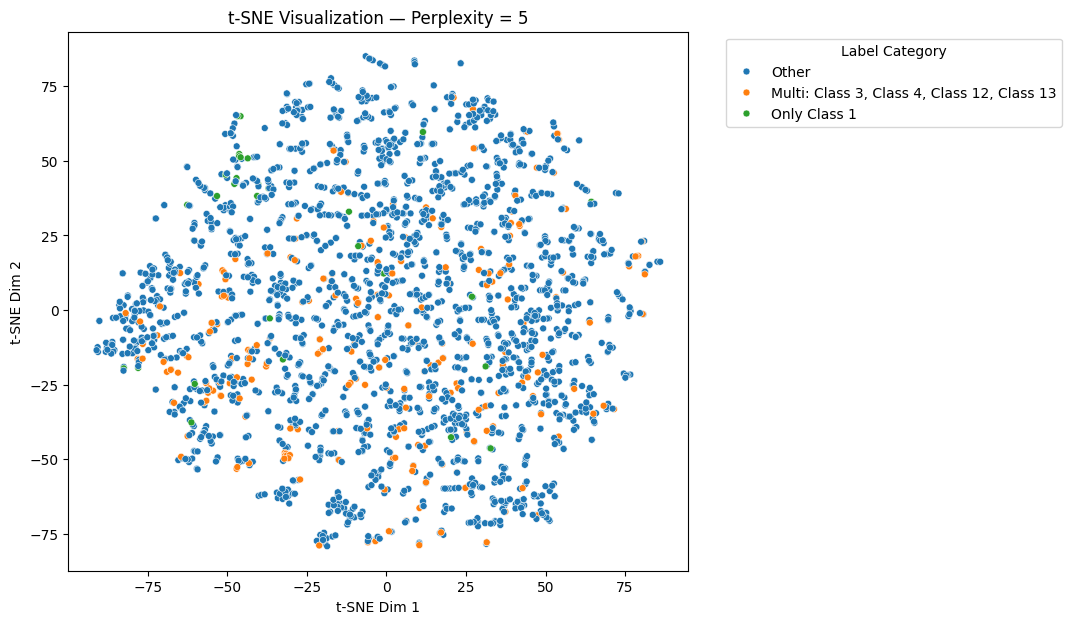

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


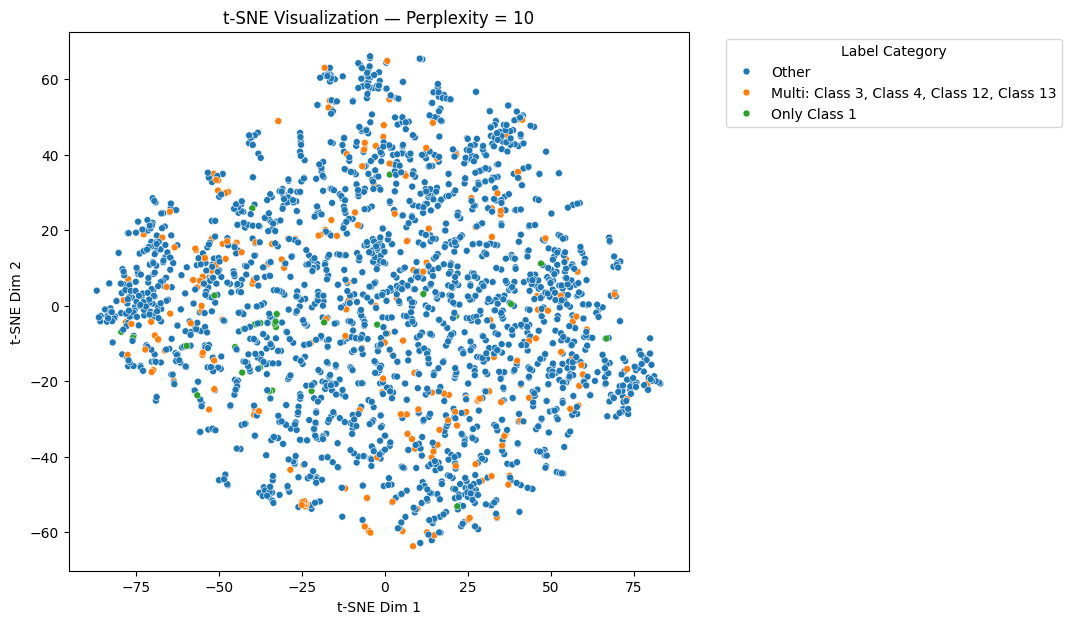

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


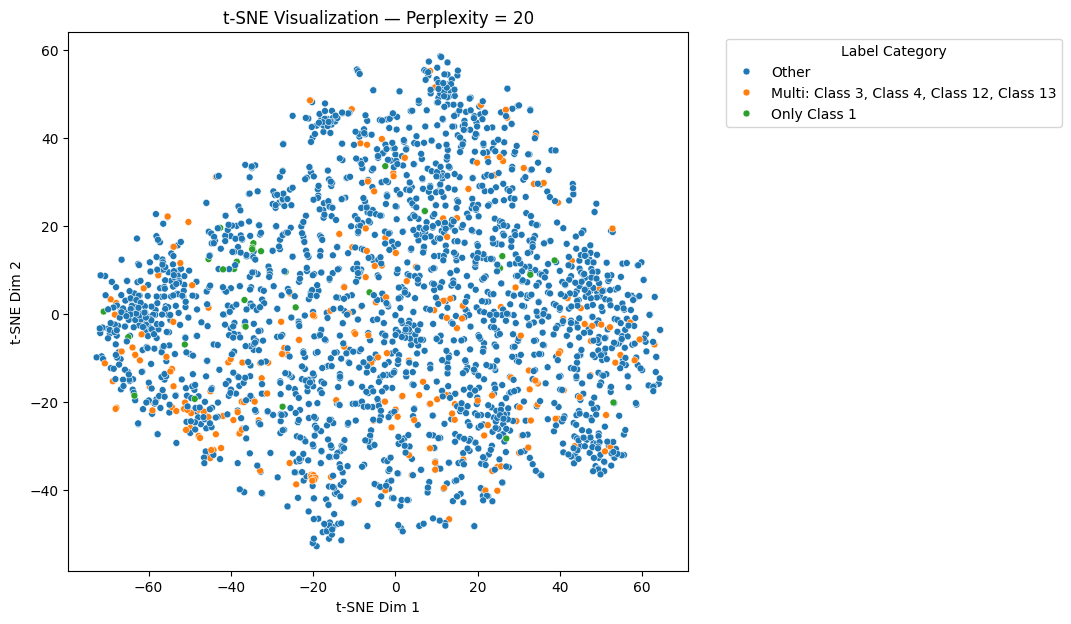

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


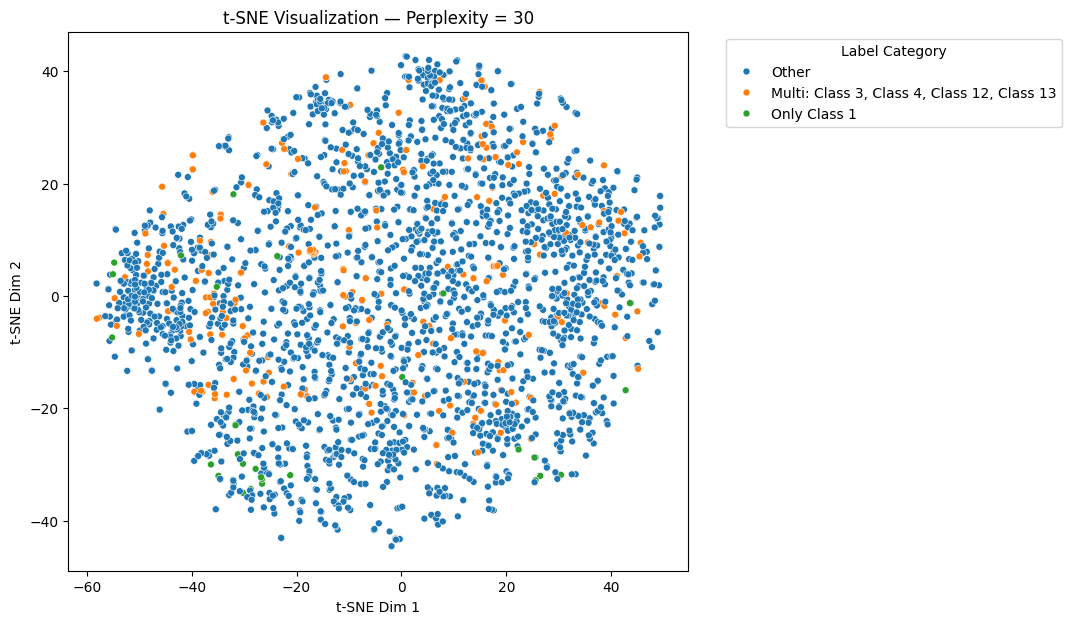

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


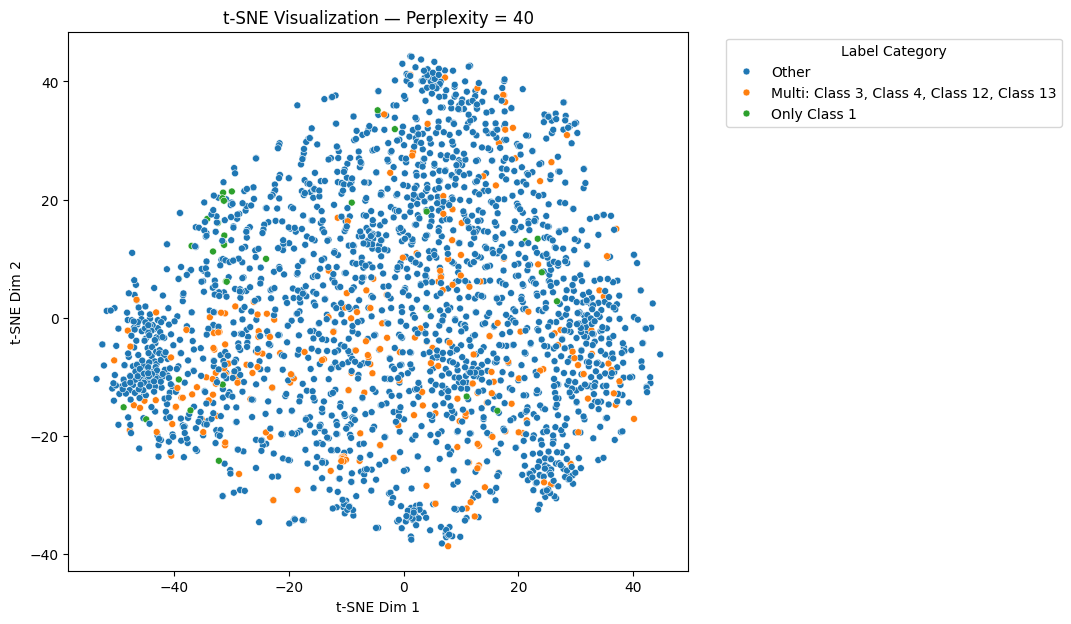

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


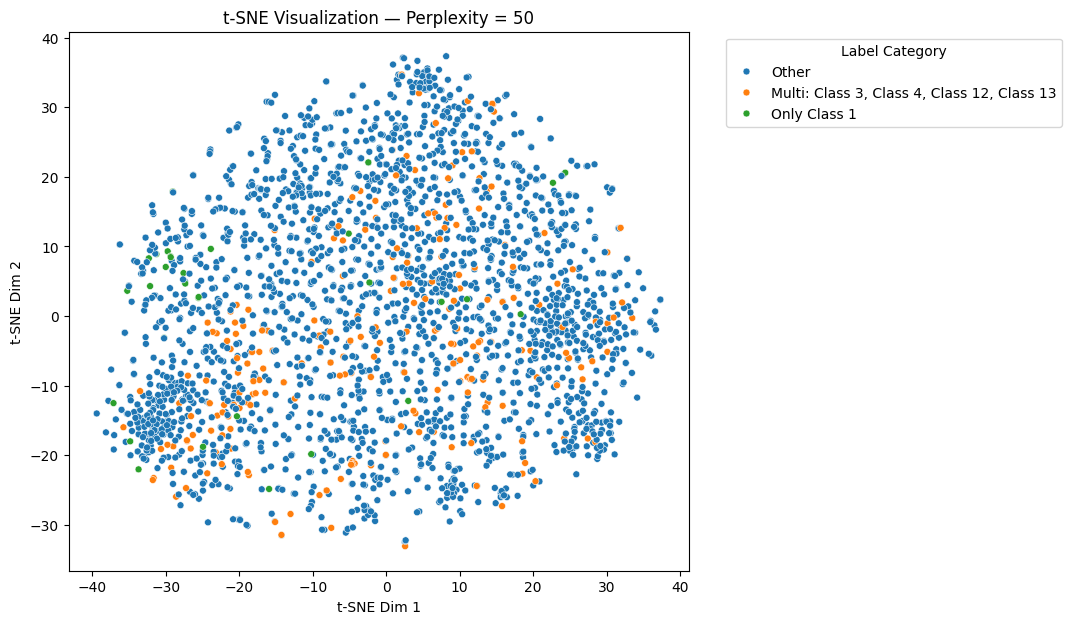

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


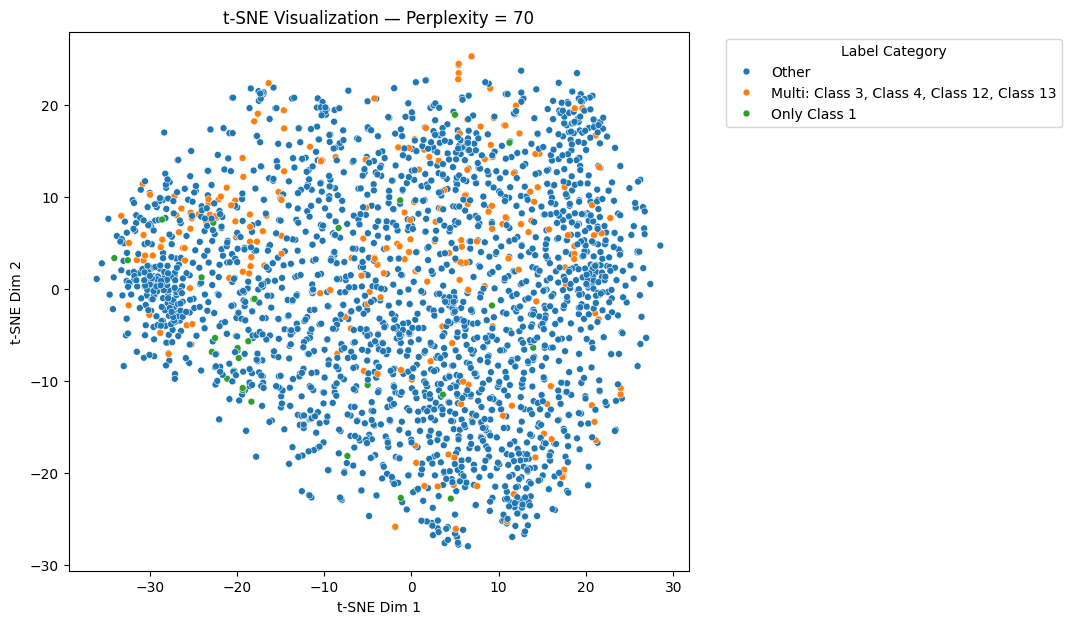


Perplexity vs. Silhouette Scores:
   Perplexity  Silhouette Score
0           5         -0.100624
1          10         -0.093796
2          20         -0.086091
3          30         -0.057275
4          40         -0.080666
5          50         -0.095584
6          70         -0.073343

Optimal perplexity based on Silhouette Score: 30


In [11]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

perplexities = [5, 10, 20, 30, 40, 50, 70]
le = LabelEncoder()
y_encoded = le.fit_transform(y_viz)
scores = [] 
for p in perplexities:
    print(f"Running t-SNE for perplexity={p}...")
    tsne = TSNE(n_components=2, perplexity=p, random_state=42, learning_rate='auto', n_iter=1000, init='pca')
    X_tsne = tsne.fit_transform(X_scaled)  # use scaled features
    # Compute silhouette score (higher = better separation)
    score = silhouette_score(X_tsne, y_encoded)
    scores.append(score)
    print(f"  Silhouette Score = {score:.4f}")
    # Create a DataFrame to summarize results

for p in perplexities:
    tsne = TSNE(n_components=2, perplexity= p, random_state=42, n_iter=1000)
    X_tsne = tsne.fit_transform(X_scaled)  # use scaled features

    plt.figure(figsize=(8,7))
    sns.scatterplot(
        x=X_tsne[:,0], y=X_tsne[:,1],
        hue= y_viz, palette='tab10', s=25
    )
    plt.title(f"t-SNE Visualization — Perplexity = {p}")
    plt.xlabel("t-SNE Dim 1")
    plt.ylabel("t-SNE Dim 2")
    plt.legend(title="Label Category", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


tsne_results = pd.DataFrame({
    'Perplexity': perplexities,
    'Silhouette Score': scores
})

print("\nPerplexity vs. Silhouette Scores:")
print(tsne_results)

# Identify the best perplexity value
best_perplexity = tsne_results.loc[tsne_results['Silhouette Score'].idxmax(), 'Perplexity']
print(f"\nOptimal perplexity based on Silhouette Score: {best_perplexity}")


## Observations from t-SNE Plots

Perplexity is a key hyperparameter in t-SNE that controls the balance between local and global structure in the data. It can be interpreted as determining the effective number of nearest neighbors each point takes into account during the embedding process.

### Perplexity = 5
- The points are very scattered and many local clusters appear.
- Seems like the local structure is captured, but the global structure may be noisy.
- Small perplexities can lead to over-clustering and fragmented clusters.

### Perplexity = 30
- The clusters are smoother and more balanced.
- Points are more evenly distributed, with less noise.
- This is usually a reasonable default; t-SNE documentation often suggests 5–50.

### Perplexity = 40
- The clusters are slightly more condensed compared to 30.
- May start to over-smooth, losing some local detail.

### How to Decide
- **Check cluster separation:** If the goal is to visualize label separation, we want clear, distinguishable clusters. Here, the “Other” points dominate, but the multi-label points (orange) and Class1 (green) are slightly more visible at perplexity 30–40.
- **Avoid over-fragmentation:** Very low perplexity (like 5) produces many tiny, noisy clusters.
- **Preserve local vs global structure:** Mid-range values (20–50) often balance local and global structures well.

### Recommendation
**Perplexity = 30** seems the best choice here. It balances smoothness and local structure, making clusters reasonably interpretable without over-fragmentation.


# 2. Visualization

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(



 Transformed shape: (2417, 2)


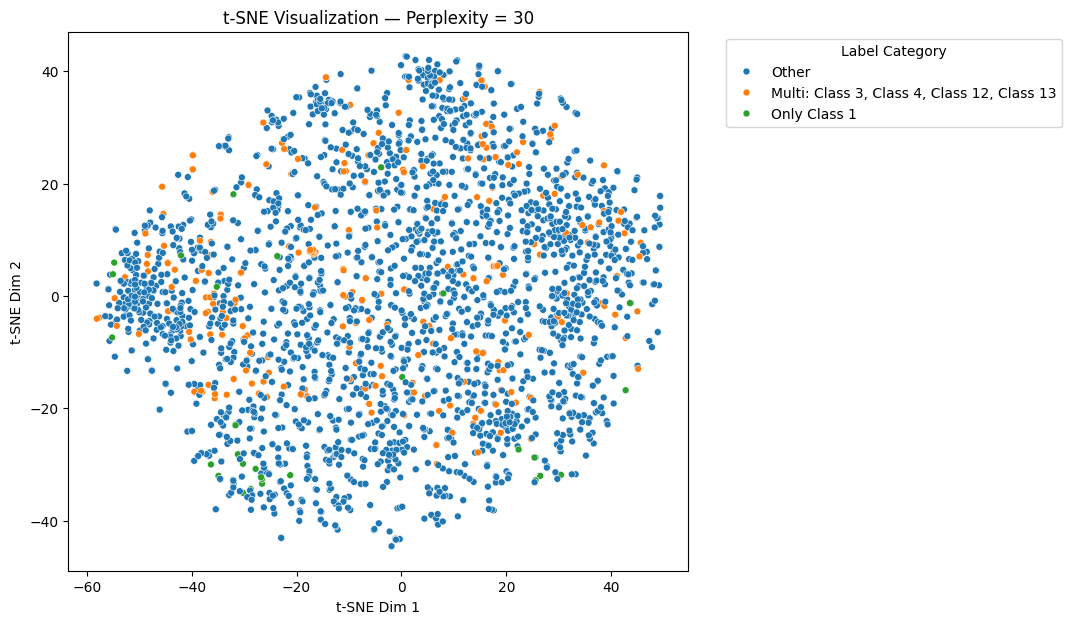

In [12]:
tsne = TSNE(n_components=2, perplexity= 30, random_state=42, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)  # use scaled features
print(f"\n Transformed shape: {X_tsne.shape}")
plt.figure(figsize=(8,7))
sns.scatterplot(
    x=X_tsne[:,0], y=X_tsne[:,1],
    hue= y_viz, palette='tab10', s=25
)
plt.title(f"t-SNE Visualization — Perplexity = {30}")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.legend(title="Label Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# 3. Veracity Inspection

## Noisy/Ambiguous Labels
- There are numerous instances of potential label noise. For example, several orange (Class3+Class4+Class12+Class13) points are deeply embedded within the large central cluster of blue (Other) points, such as near coordinates `(0, 20)` and `(-20, -20)`.  

- Similarly, a few green (Class1) points are isolated within blue regions, like the one near `(10, -30)`.  

- This indicates that the feature vectors of these embedded points are highly similar to their neighbors, yet their assigned labels are different.  

- Possible reasons:
  - The label is incorrect (noisy) due to an error in data annotation.  
  - The features themselves are not discriminative enough (ambiguous) to separate these samples from the Other category.

## Outliers
- Several outliers are visible, existing far from the main data cloud:
  - An isolated orange point near `(-25, 40)` at the top of the plot.  
  - A solitary blue point on the far left edge around `(-60, 0)`.  
  - A small, distant cluster of a few blue points at the top, centered around `(-10, 40)`.  

- **Hypothesis:** These outliers represent samples with unique or extreme feature patterns. In a biological context, such patterns might indicate:
  - Technical artifacts from experimental errors or sample contamination.  
  
  - A rare cell type or a unique biological state not well-represented in the data.  
  
  - Measurement errors where one or more features have unusually high or low values.

## Hard-to-Learn Samples
- The dense central region of the plot represents a significant challenge for simple classifiers.  

- In this area, blue (Other) and orange (Class3+...) points are thoroughly mixed, creating high overlap with no clear boundary.  

- A simple classifier (e.g., logistic regression) tries to find a linear decision boundary.  

- In this heavily intermingled region, no simple line can effectively separate the orange and blue points without misclassification.  

- Consequently, the classifier would struggle here due to **non-linearly separable classes**, leading to poor performance and low prediction accuracy in this zone.


#### **Why Simple Classifiers Struggle in Hard-to-Learn Regions**

In areas where category colors are highly mixed, simple models (like Logistic Regression or basic Decision Trees) struggle because:

1. **No Clear Boundaries:** Classes overlap heavily, making it impossible for linear or simple splits to separate them.  
2. **Frequent Misclassification:** Overlapping data leads to many incorrect predictions.  
3. **Low Confidence:** Close proximity of different classes causes uncertain predictions.  
4. **Poor Generalization:** The model may overfit noise instead of learning meaningful patterns.

In short, the overlapping data lacks distinct features for a simple model to differentiate categories effectively.

# Part C: Isomap and Manifold Learning

# 1. Isomap Implementation

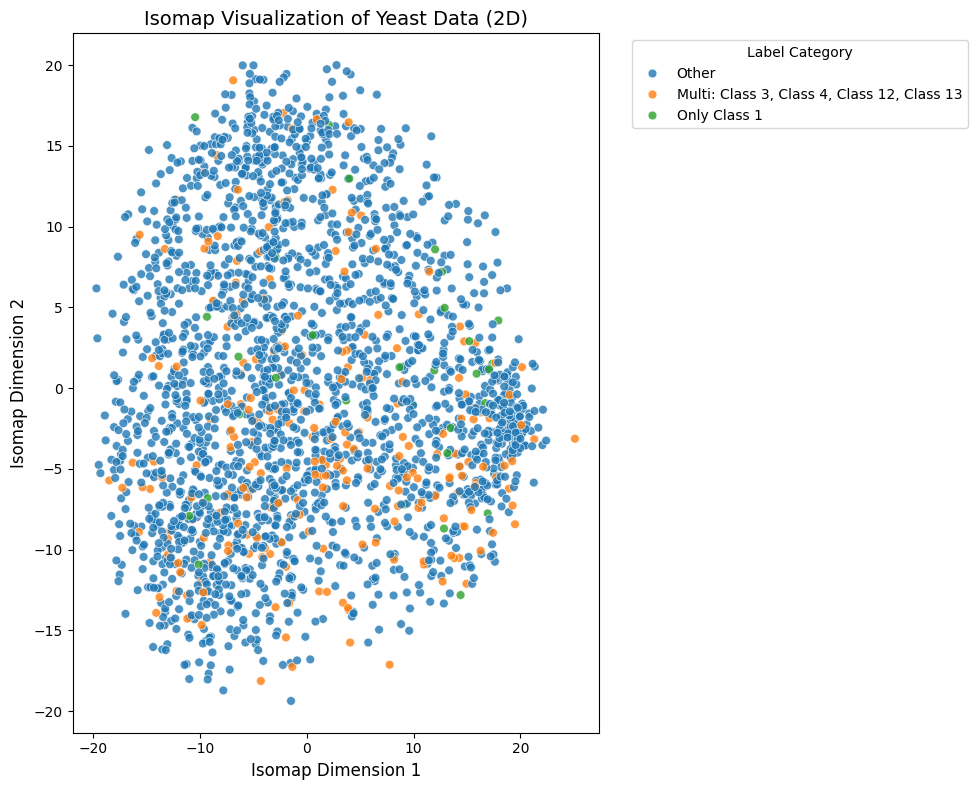


 Isomap reduction complete. Transformed shape: (2417, 2)


In [13]:
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt
import seaborn as sns

# Apply Isomap
isomap = Isomap(n_neighbors= 15, n_components=2)  # n_neighbors: size of local neighborhood
X_iso = isomap.fit_transform(X_scaled)

# Scatter plot using the same visual_labels as t-SNE
plt.figure(figsize=(10,8))
sns.scatterplot(
    x=X_iso[:,0], y=X_iso[:,1],
    hue= y_viz,  # Simplified categorical labels
    palette='tab10',
    s=40,
    alpha=0.8
)

plt.title("Isomap Visualization of Yeast Data (2D)", fontsize=14)
plt.xlabel("Isomap Dimension 1", fontsize=12)
plt.ylabel("Isomap Dimension 2", fontsize=12)
plt.legend(title="Label Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print(f"\n Isomap reduction complete. Transformed shape: {X_iso.shape}")


# Fundamental Difference: Isomap vs t-SNE

| Aspect                 | Isomap                                                                                                 | t-SNE                                                                            |
| ---------------------- | ------------------------------------------------------------------------------------------------------ | -------------------------------------------------------------------------------- |
| **Goal**               | Preserve **global structure** by maintaining **geodesic distances** along the manifold                 | Preserve **local neighborhoods** (similar points stay close)                     |
| **Distance metric**    | Computes **shortest paths** on the graph of nearest neighbors (geodesic distance)                      | Builds **probabilities based on pairwise distances** to model local similarity   |
| **Embedding behavior** | Maintains **overall shape of the data manifold**, good for observing clusters and global relationships | Focuses on **cluster separation**, may distort global distances                  |
| **Best for**           | Understanding **global geometry** (outliers, overall topology)                                         | Visualizing **local clusters**, identifying local patterns or noisy points       |
| **Visualization**      | Preserves large-scale structure; clusters may be closer or farther apart according to true manifold    | Preserves local clusters; distances between clusters are not meaningful globally |


# Intuition for Yeast Dataset

- t-SNE: Excellent for seeing tight clusters of genes that share similar functional categories.

- Isomap: Helps reveal overall data topology, e.g., whether multi-label combinations lie in the same manifold region as single-label points.

- Using both together can highlight data veracity issues:

    - Outliers → points far from clusters

    - Noisy/mixed labels → regions where multiple categories overlap

# 2. Visualization

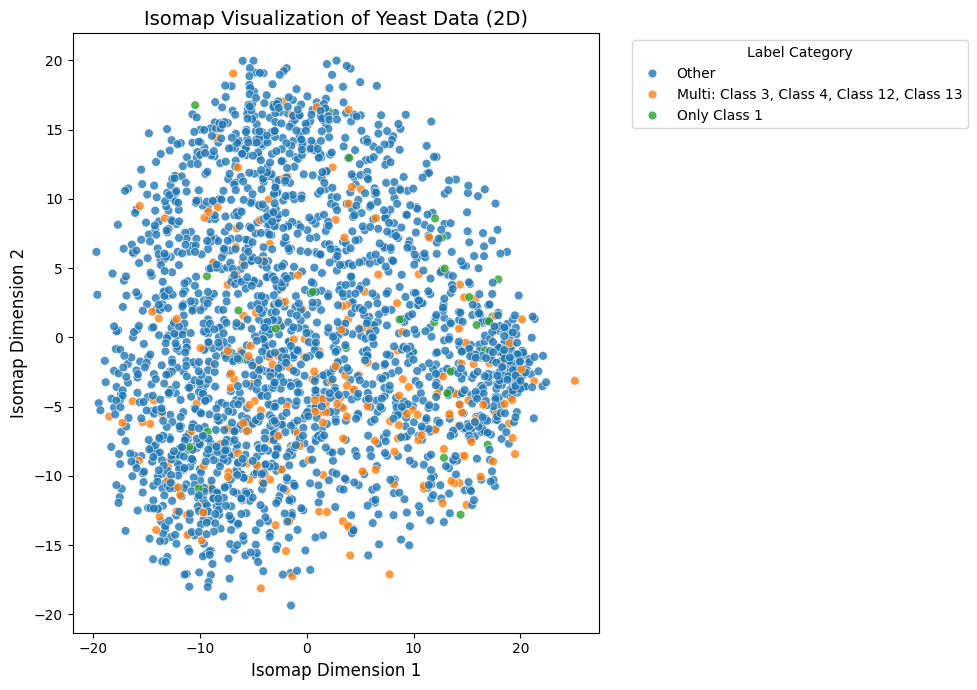

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of Isomap 2D embedding
plt.figure(figsize=(10,7))
sns.scatterplot(
    x=X_iso[:,0], y=X_iso[:,1],
    hue= y_viz,            # Use the same simplified labels
    palette='tab10',              # Up to 10 distinct colors
    s=40,                         # Marker size
    alpha=0.8                     # Slight transparency
)

plt.title("Isomap Visualization of Yeast Data (2D)", fontsize=14)
plt.xlabel("Isomap Dimension 1", fontsize=12)
plt.ylabel("Isomap Dimension 2", fontsize=12)
plt.legend(title="Label Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# 3. Comparison and Curvature

# Comparison of Isomap and t-SNE Visualizations

## 1. Isomap vs t-SNE

**Isomap** preserves **global structure** by maintaining geodesic distances between points.  
- Shows a single, connected cloud structure in the data points.  
- Indicates yeast gene expression data forms a continuous structure.  
- Classes are distributed throughout rather than forming large-scale clusters.

**t-SNE** preserves **local similarities**, keeping nearby points close in the low-dimensional map.  
- Produces tighter, more separated clusters which confirms about the local structure.  
- Excellent for local patterns but may distort global structure.  
- Cluster separations do not necessarily reflect true distances in the original high-dimensional space.

**Insight:** Isomap better represents the overall data structure, while t-SNE emphasizes local neighborhoods.


## 2. Data Manifold and Classification Difficulty


- The Isomap plot does not suggest a highly curved or complex manifold. 

- The visualization shows a single, relatively uniform cloud of points without distinct folds, holes, or separate branches. 

- This indicates that the underlying manifold of the yeast data is likely a single, continuous, and relatively simple surface. 

- A highly complex or curved manifold might have resulted in a more distorted or fragmented visualization as the algorithm tried to flatten it. 

- Main challenge for classification: **class overlap**, not manifold complexity.  

- Top categories (e.g., blue = Other, orange = top multi-label, green = top single-label) are heavily intermingled.  

- Distinct regions would make classification easier, but overlapping points complicate decision boundaries.

**Conclusion:** Classification is difficult because different classes share similar gene expression profiles on a simple, continuous manifold.
